# Yu-Gi-Oh Deck Analysis for Spring 2019

Developed by: Jacob Powell
    
    Start Date: 2/02/2019
    
    End Date: 7/06/2019
    
I was asked to assist my local card shop determine the top deck of this semester's Yu-Gi-Oh Tournament format. However, in order to determine this I will be acquiring and analyzing the data throughout the semester. Although what is the specific part I will be looking for? I will be trying to identify an outlier among the decks via several methods: Normality Plot, Heatmap and Data Matrix interpretation and Cluster Analysis.

However let us first look at our data and see if there is anything that can be used to help us start our analysis.

In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot


In [2]:
data = pandas.read_excel('2019_BI_ANNUAL_DECK_STATISTICS.xlsx')
data

,Name,Entries,Points
0,Sky Striker,12,87
1,Salamangreat,23,105
2,Orcust OTK,7,36
3,Azathot Turbo,8,30
4,Cyber Dragon,4,18
5,Ritual Beast,6,18
6,Zombie World,8,24
7,Danger! Thunder Dragon,3,21
8,Kozmo Draco,2,12
9,Dark Magician,2,9


Next we are going to be formatting the information into another column where we will be able to determine the Player Point per Entry average. So this "PPE" as we will call it will help us find the average amount of points this deck would win per tournament. We will then use this information to help us determine which deck had the most success and caused the most difficulties in the local meta.

In [3]:
data.Points = data.Points/3
PPE = []
for x in range(len(data)):
    PPE.append(data.Points[x]/data.Entries[x])
data['PPE'] = PPE
data

,Name,Entries,Points,PPE
0,Sky Striker,12,29.0,2.416667
1,Salamangreat,23,35.0,1.521739
2,Orcust OTK,7,12.0,1.714286
3,Azathot Turbo,8,10.0,1.250000
4,Cyber Dragon,4,6.0,1.500000
5,Ritual Beast,6,6.0,1.000000
6,Zombie World,8,8.0,1.000000
7,Danger! Thunder Dragon,3,7.0,2.333333
8,Kozmo Draco,2,4.0,2.000000
9,Dark Magician,2,3.0,1.500000


Up next we will be taking this table and trying to normalize the quantified data for the Entries, Points, and PPE average. This will allow us to see any irregularities more effectively.

In [4]:
quant = data.iloc[:, 1:]
norm = (quant - quant.mean())/quant.std()
norm

,Entries,Points,PPE
0,2.106552,3.354092,1.439574
1,4.657606,4.179245,-0.092919
2,0.946982,1.016160,0.236802
3,1.178896,0.741109,-0.558250
4,0.251240,0.191008,-0.130145
5,0.715068,0.191008,-0.986356
6,1.178896,0.466058,-0.986356
7,0.019326,0.328533,1.296872
8,-0.212588,-0.084043,0.726065
9,-0.212588,-0.221569,-0.130145


We then next remerge the Names of the decks played along with the normalized data in a new table.

In [5]:
deck_norm = pandas.DataFrame(data.Name)
deck_norm["Entries_Norm"] = norm.Entries
deck_norm["Points_Norm"] = norm.Points
deck_norm["PPE"] = norm.PPE
deck_norm

,Name,Entries_Norm,Points_Norm,PPE
0,Sky Striker,2.106552,3.354092,1.439574
1,Salamangreat,4.657606,4.179245,-0.092919
2,Orcust OTK,0.946982,1.016160,0.236802
3,Azathot Turbo,1.178896,0.741109,-0.558250
4,Cyber Dragon,0.251240,0.191008,-0.130145
5,Ritual Beast,0.715068,0.191008,-0.986356
6,Zombie World,1.178896,0.466058,-0.986356
7,Danger! Thunder Dragon,0.019326,0.328533,1.296872
8,Kozmo Draco,-0.212588,-0.084043,0.726065
9,Dark Magician,-0.212588,-0.221569,-0.130145


In order to make reading the table's information easier we are next going to sort them alphabetically by name.

In [6]:
deck_norm = deck_norm.sort_values(by = "Name", ascending = True)
deck_norm

,Name,Entries_Norm,Points_Norm,PPE
35,Altergeist,-0.444502,-0.496620,-0.986356
3,Azathot Turbo,1.178896,0.741109,-0.558250
20,Burning Abyss,-0.212588,-0.221569,-0.130145
21,Chaos Turbo,-0.444502,-0.496620,-0.986356
22,Cubics,-0.444502,-0.496620,-0.986356
4,Cyber Dragon,0.251240,0.191008,-0.130145
7,Danger! Thunder Dragon,0.019326,0.328533,1.296872
13,Danger! Thunder Dragon Guardragon,-0.444502,-0.359094,0.726065
9,Dark Magician,-0.212588,-0.221569,-0.130145
23,Darklords,-0.444502,-0.496620,-0.986356


We are next going to use a distance matrix to help us form our data into useful information that will be easy to understand. This matrix will be able to determine the distance between every single point.

In [7]:
def dist(i,j):
    quant = data.iloc[:, 1:]
    cat = data.iloc[:, :0]
    norm = (quant - quant.mean())/quant.std()
    hdist = (cat.iloc[i] != cat.iloc[j]).sum()
    
    qdist = ((norm.iloc[i] - norm.iloc[j]).abs()).sum()
    return hdist + qdist

In [8]:
matrix = pandas.DataFrame(index = data.index, columns = data.index, dtype = float)
for i in range(len(matrix.index)):
    for j in range(i):
        matrix.iloc[i,j] = dist(i,j)
        matrix.iloc[j,i] = dist(j,i)
matrix

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,NaN,4.908699,4.700274,5.538463,6.588116,6.980498,6.241619,5.255487,6.470784,7.464520,...,8.827695,8.827695,6.977749,8.827695,8.827695,8.827695,6.977749,6.977749,7.464520,8.827695
1,4.908699,NaN,7.203429,7.382177,8.431829,8.824212,8.085333,9.878782,9.952465,9.308233,...,10.671409,10.671409,10.459430,10.671409,10.671409,10.671409,10.459430,10.459430,9.308233,10.671409
2,4.700274,7.203429,NaN,1.302017,1.887842,2.280224,2.005174,2.675353,2.749036,2.764246,...,4.127421,4.127421,3.256001,4.127421,4.127421,4.127421,3.256001,3.256001,2.764246,4.127421
3,5.538463,7.382177,1.302017,NaN,1.905863,1.442035,0.703156,3.427269,3.500952,2.782267,...,3.289232,3.289232,4.007917,3.289232,3.289232,3.289232,4.007917,4.007917,2.782267,3.289232
4,6.588116,8.431829,1.887842,1.905863,NaN,1.320038,2.058917,1.796457,1.595089,0.876404,...,2.239580,2.239580,2.102054,2.239580,2.239580,2.239580,2.102054,2.102054,0.876404,2.239580
5,6.980498,8.824212,2.280224,1.442035,1.320038,NaN,0.738879,3.116495,2.915128,2.196443,...,1.847197,1.847197,3.422093,1.847197,1.847197,1.847197,3.422093,3.422093,2.196443,1.847197
6,6.241619,8.085333,2.005174,0.703156,2.058917,0.738879,NaN,3.580323,3.654007,2.935321,...,2.586076,2.586076,4.160971,2.586076,2.586076,2.586076,4.160971,4.160971,2.935321,2.586076
7,5.255487,9.878782,2.675353,3.427269,1.796457,3.116495,3.580323,NaN,1.215297,2.209033,...,3.572209,3.572209,1.722262,3.572209,3.572209,3.572209,1.722262,1.722262,2.209033,3.572209
8,6.470784,9.952465,2.749036,3.500952,1.595089,2.915128,3.654007,1.215297,NaN,0.993736,...,2.356911,2.356911,0.506965,2.356911,2.356911,2.356911,0.506965,0.506965,0.993736,2.356911
9,7.464520,9.308233,2.764246,2.782267,0.876404,2.196443,2.935321,2.209033,0.993736,NaN,...,1.363175,1.363175,1.225650,1.363175,1.363175,1.363175,1.225650,1.225650,0.000000,1.363175


Next we are going to sort the table by the PPE scores after they have been normalized thus making the information easier to translate into a basic heatmap and hexbin graph.

In [9]:
PPE_Sorted_table = deck_norm.sort_values(by = "PPE", ascending = False)
PPE_Sorted_table

,Name,Entries_Norm,Points_Norm,PPE
11,Subterrors,-0.444502,-0.221569,2.438486
12,Thunder Dragon,-0.444502,-0.221569,2.438486
0,Sky Striker,2.106552,3.354092,1.439574
7,Danger! Thunder Dragon,0.019326,0.328533,1.296872
28,Nekroz,-0.444502,-0.359094,0.726065
16,Mayakashi,-0.444502,-0.359094,0.726065
15,Level 3 Spam,-0.444502,-0.359094,0.726065
8,Kozmo Draco,-0.212588,-0.084043,0.726065
14,Frogs,-0.444502,-0.359094,0.726065
32,Mythical Beast Endymion,-0.444502,-0.359094,0.726065


# Deciphering the Data Matrix

Now with this information we will be trying to identify any outliers in the data with the help of a basic heatmap, a hexbin graph, and line graph.

Once done we will be able to identify the outliers via differences in potential linearity and will be able to remove them if wanted.

These outliers will be denoted by a different coloration, distance away from the line of normalization, and if it doesn't follow the same line among the hexbins or is of a different color as well. Aside from this the data will now be able to be easily interpreted. However what are some possible culprits we can go ahead and identify from our current set of data?

If we go off the PPE scores alone the top 4 would be Salamangreat, Thunder Dragon, Sky Strikers, and Subterrors. However if we were to go off of the normalization scores we would have Salamangreat, Sky Strikers, Azathot Turbo, Orcust OTK, and Zombie World. Since there is two decks within both categories we will make an assumption that the culprits wil be Salamangreats and Sky Strikers.

Now lets check this information and see if it will change or if they will remain to be the culprits of being to powerful within the local META*.
________________________________________________________________________________________________________________________________
Definitions:
---------------------------------------------------------------------------------------------------------------------------------------
META is a term that means it is one of the main competitive decks that you will encounter and the strategy of that deck will not truly differ from one to another.

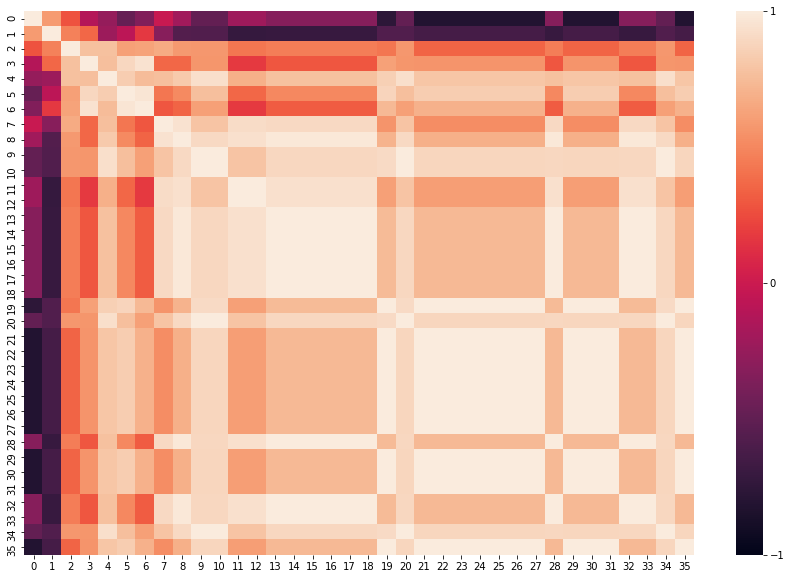

In [10]:
import seaborn
correlation = matrix.corr()
matplotlib.pyplot.figure(figsize = (15,10))
label_ticks = range(-1,2)
correlation_map = seaborn.heatmap(correlation, vmin = -1, vmax = 1, xticklabels = correlation.index, yticklabels = correlation.index, cbar_kws = {'ticks':label_ticks})
correlation_map

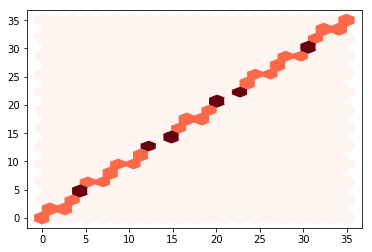

In [11]:
matplotlib.pyplot.hexbin(correlation.index, correlation.index, cmap = matplotlib.pyplot.cm.Reds, gridsize = 20)

As we can see by the use of the hexbin graph and the heatmap there are some irregularities among the data. Two in which we can identify right off the map according to the heatmap is Number zero: Sky Striker and Number one: Salamangreat. These two are currently to Meta relevant or highly competitive decks most duelists use. 

Howevever we do get to see that another two decks don't register on the coloration spectrum of the hexbin graph, Cubics and Darklords. This would be due to their scoring being lower than the rest and they would be considered not useful in data interpretation.

However we can check this information via a normal probability plot so as to see if it follows a line of regression. If not we might have to reform this basic idea and begin again.

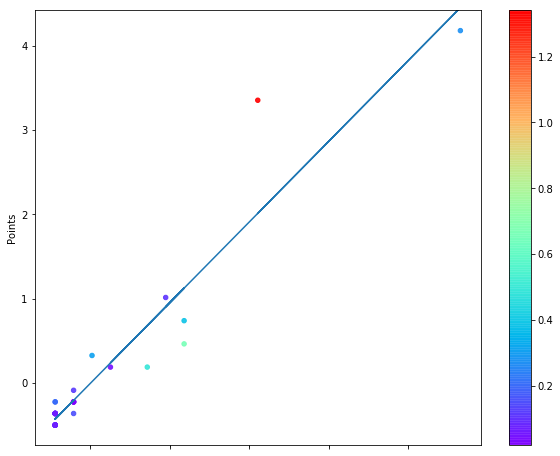

In [14]:
reg_param_0 = numpy.polyfit(norm.Entries, norm.Points, 1)
slope_0 = reg_param_0[0]
intercept_0 = reg_param_0[1]
estimate_0 = slope_0 * norm.Entries + intercept_0
Error_0 = norm.Points - estimate_0

scatter_1 = norm.plot.scatter(x = 'Entries', y = "Points", c = abs(Error_0), figsize = (10,8), cmap = matplotlib.pyplot.cm.rainbow, alpha = 0.9)
scatter_1.add_line(matplotlib.lines.Line2D(norm.Entries, estimate_0))

As we can see from the data most if not all the data follow the line of regression and normality of the data. However there is one point that stands out from the rest causing it to become the sole outlier. This would happen to be the Sky Striker deck but what caused this and why?

This deck may have become the outlier due to several factors: Deck Consistency, Player Performance, Skill, Deck Match-up, or possible Deck Engine mixtures. However since this deck has been a top contender and one of the Big Four decks: Thunder Dragon Guardragon Danger, Orcust, Salamangreat, and Sky Striker. 

Yet there is one deck that is an outlier that follows the line of normalization: Salamangreat. This deck has some of the highest amount of points and highest amount of entries. So this may also be the result as to why this deck is performing at a higher standard than others. Even though it does follow the path of normality it is still something to keep in mind during the next step.

However, with the right conditions such as a player who qualified with this deck, having the knowledge of how it works, and knowing what counters these decks would lead to such a possibility of it becoming an outlier as well.

To finally finish up this overview we will try to figure out if there is anything else abnormal aside from our one outlier by forming clusters. If the potential outlier is within its own group and is the farthest away from the other groups this will guarantee the hypothesis that it is the most problematic deck due to its strenght, recovery, resourcefulness and consistency even due to potential power creep.

In [15]:
import sklearn.cluster
import sklearn.manifold
import nose.tools

In [18]:
km = sklearn.cluster.KMeans(n_clusters = 5)
labels = km.fit_predict(norm)
new_data = PPE_Sorted_table.copy()
new_data['Cluster'] = labels
new_data = new_data.sort_values(by = 'Cluster', ascending = True)
new_data

,Name,Entries_Norm,Points_Norm,PPE,Cluster
27,Zoodiac Dino,-0.444502,-0.496620,-0.986356,0
24,Evil Eye,-0.444502,-0.496620,-0.986356,0
25,Exodia,-0.444502,-0.496620,-0.986356,0
26,Invoked Thunder Dragon,-0.444502,-0.496620,-0.986356,0
5,Ritual Beast,0.715068,0.191008,-0.986356,0
35,Altergeist,-0.444502,-0.496620,-0.986356,0
30,Satellarknights,-0.444502,-0.496620,-0.986356,0
6,Zombie World,1.178896,0.466058,-0.986356,0
19,Timelord,-0.212588,-0.359094,-0.986356,0
31,Sky Striker Mekk-Knight Invoked,-0.444502,-0.496620,-0.986356,0


In [22]:
mdsinits = norm.loc[:, ['Entries', 'Points']]
ms = sklearn.manifold.MDS(n_components = 2, dissimilarity = 'euclidean', \
                         eps = 0, max_iter = 1000, n_init = 1)
#-----------------------------------------------------------------------------
red_data = pandas.DataFrame(ms.fit_transform(norm, mdsinits), columns = ['X', 'Y'])
dist_table = pandas.DataFrame(columns = ['Name', 'X', 'Y'])
dist_table.Name = data.Name
dist_table.X = red_data.X
dist_table.Y = red_data.Y
new_data['X'] = abs(red_data.X)
new_data['Y'] = abs(red_data.Y)
new_data

,Name,Entries_Norm,Points_Norm,PPE,Cluster,X,Y
27,Zoodiac Dino,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
24,Evil Eye,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
25,Exodia,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
26,Invoked Thunder Dragon,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
5,Ritual Beast,0.715068,0.191008,-0.986356,0,1.183010,0.344684
35,Altergeist,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
30,Satellarknights,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480
6,Zombie World,1.178896,0.466058,-0.986356,0,1.383469,0.802550
19,Timelord,-0.212588,-0.359094,-0.986356,0,0.857942,0.573449
31,Sky Striker Mekk-Knight Invoked,-0.444502,-0.496620,-0.986356,0,0.805374,0.807480


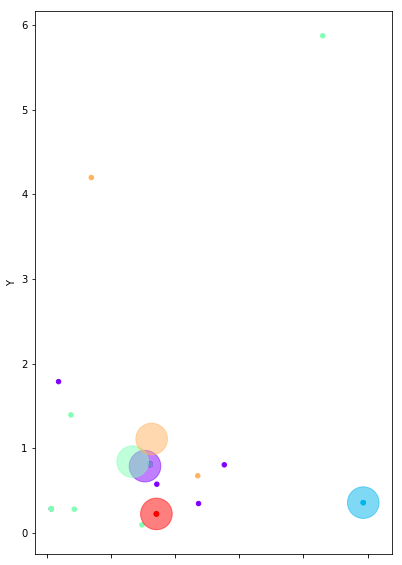

In [24]:
plot = new_data.plot.scatter(c= 'Cluster', x = 'X', y = 'Y', cmap = matplotlib.pyplot.cm.rainbow, figsize = (10,10))
groups = new_data.groupby('Cluster')
centroid = groups.mean()
centroid.plot.scatter(c = centroid.index, x = 'X', y = 'Y', cmap = matplotlib.cm.rainbow, s = 1000, ax = plot, alpha = .5)
plot.figure.axes[1].remove()
plot.figure.axes[1].remove()

In [25]:
new_cent_tab = pandas.DataFrame(centroid.X, columns = ['X', 'Y'])
new_cent_tab.Y = centroid.Y
new_cent_tab

,X,Y
Cluster,,
0,0.765976,0.786804
1,2.465441,0.355336
2,0.669850,0.840215
3,0.817840,1.107615
4,0.854841,0.221910


As we can now see from the data, there are a few outliers, two which are more extreme than others: Salamangreat and Sky Strikers and another two which are less extreme: Azathot Turbo and Orcust. From this we can ascertain that it does prove Salamangreat and Sky Strikers are the most powerful decks in the local tournaments.

# Conclusion

Now due to the data, as shown above, we see that the two decks that are causing the most problematic issues with keeping a fair and equal gameplay are Salamangreat and Sky Striker. Thes two decks are straying the farthest away from the rest in the clusters however Salamangreat does follow the line of regression and normality. This may change in the future due to Yu-Gi-Oh's impending banlist which may further limit the power of these decks allowing them to be power crept out of the meta or it might turn them into useable engines for other decks to run.

However these decks are very consistent and powerful in the current meta and if they were to not be fixed with an adjustment or a new deck being created to counter them then they will continue to take the game scene by storm and by force. Now if they were to be hit in a banlist in the future they would be able to continue to be played but possibly not the current power we are seeing displayed by the data above. 

However these decks consistency, searchability, power, and recoverability are major factors as to why these decks are causing trouble for the local meta and are becoming problematic.

__________________________________________________________________

Thus in short:

Problem: What are/is the deck that is causing the most trouble in the local meta?

Possible Culprits: Orcust, Azathot Turbo, Thunder Dragon, Sky Striker, Salamangreats

Data Analysis: Salamangreats follows line of normality however is a outlier among its own cluster, Sky Strikers do not follow line of normality and are not a part of its own cluster. Orcust, Azathot Turbo are slight outliers among their clusters and follow the line of normality. Thunder Dragons follow the line of normality and are among their own cluster.

Conclusion: Salamangreats and Sky Strikers are too powerful for the local meta and should be put into check, or will be put into check on the next banlist.